# Large Network Information Embedding (LINE) Implementation
### Yonsei App.Stat.
### Sunwoo Kim

### Contents

- Karate Club Dataset Implementation
- Football Dataset Implementation

## 1. Karate Club

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys 
import networkx as nx 
import time
from IPython.display import clear_output

In [2]:
a = []
with open('karate_club.adjlist') as f : 
    for line in f : 
        a.append(line.rstrip().split())
a = a[3:]
adj_array = np.zeros(len(a)*len(a)).reshape(len(a), len(a))

for i1 in a : 
    for i2 in range(len(i1)) : 
        index1 = int(i1[0]) ; index2 = int(i1[i2])
        adj_array[index1, index2] = 1

adj_half = adj_array
adj_array = adj_array + adj_array.transpose()

for i in range(adj_array.shape[0]) : adj_array[i,i] = 0
for i in range(adj_half.shape[0]) : adj_half[i,i] = 0

## 현재 Edge Index가 adj_array에 할당된 상태입니다

target = []
with open('karate_label.txt') as f : 
    for line in f : 
        target.append(int(line.rstrip().split()[1]))

red = np.where(np.array(target) == 1)[0] + 1
green = np.where(np.array(target) == 0)[0] + 1

## 색깔별 노드의 class를 할당해줍니다.

In [31]:
## 시각화를 위한 함수를 정의해줍니다.

def multiple_visualize_result (m_embedding_result, targets, title) :
    """
    param: embedding_result = W Matrix
    param: targets = target labels
    """
    
    for t in range(len(m_embedding_result)) :
        plt.figure(figsize = (7, 7))
        plt.title((title + " in epoch ") + format(t+1))
        embedding_result = m_embedding_result[t]
        color_list = ['lime', 'red']
        for i in range(34) : 
            target_ = targets[i]
            plt.scatter(embedding_result[i,0], embedding_result[i,1], color = color_list[target_])
        for i, txt in enumerate(np.arange(1,35)):
            plt.annotate((i + 1), (embedding_result[:, 0][i], embedding_result[:, 1][i]), size = 15)
        time.sleep(0.2)
        plt.show()
        clear_output(wait=True)

In [32]:
## 시각화를 위한 함수를 정의해줍니다.

def multiple_visualize_result_fp (m_embedding_result, targets, title) :
    """
    param: embedding_result = W Matrix
    param: targets = target labels
    """
    
    for t in range(len(m_embedding_result)) :
        plt.figure(figsize = (7, 7))
        plt.title((title + " in epoch ") + format(t+1))
        embedding_result = m_embedding_result[t]
        color_list = ["darkred", 'red', 'coral', 'orange', 
             'yellow', 'greenyellow', 'green', 'cyan', 
             'royalblue', 'blue', 'magenta', 'purple']
        for i in range(115) : 
            target_ = targets[i]
            plt.scatter(embedding_result[i,0], embedding_result[i,1], color = color_list[target_])
        for i, txt in enumerate(np.arange(0,115)):
            plt.annotate((i), (embedding_result[:, 0][i], embedding_result[:, 1][i]), size = 15)
        plt.show()
        clear_output(wait=True)

In [47]:
## 시각화를 위한 함수를 정의해줍니다.

def visualize_result (embedding_result, targets, title) :
    """
    param: embedding_result = W Matrix
    param: targets = target labels
    """
    plt.figure(figsize = (10, 10))
    plt.title(title)
    color_list = ['lime', 'red']
    for i in range(34) : 
        target_ = targets[i]
        plt.scatter(embedding_result[i,0], embedding_result[i,1], color = color_list[target_])
    for i, txt in enumerate(np.arange(1,35)):
        plt.annotate((i + 1), (embedding_result[:, 0][i], embedding_result[:, 1][i]), size = 15)
    plt.show()

In [12]:
## 시각화를 위한 함수를 정의해줍니다.

def visualize_result_fb (embedding_result, targets, title) :
    """
    param: embedding_result = W Matrix
    param: targets = target labels
    """
    plt.figure(figsize = (10, 10))
    plt.title(title)
    color_list = ["darkred", 'red', 'coral', 'orange', 
             'yellow', 'greenyellow', 'green', 'cyan', 
             'royalblue', 'blue', 'magenta', 'purple']
    for i in range(115) : 
        target_ = targets[i]
        plt.scatter(embedding_result[i,0], embedding_result[i,1], color = color_list[target_])
    for i, txt in enumerate(np.arange(0,115)):
        plt.annotate((i), (embedding_result[:, 0][i], embedding_result[:, 1][i]), size = 15)
    plt.show()

Number of Node is 34
Number of Edge is 78


(-0.45981391991932524,
 0.5736351175763252,
 -0.7895704652661295,
 1.0852176412031491)

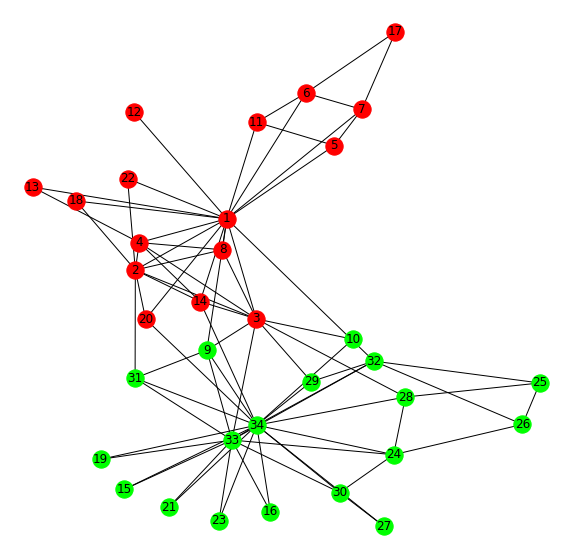

In [5]:
G = nx.Graph()
for i in range(np.where(adj_half > 0)[0].shape[0]) : 
    G.add_edge(np.where(adj_half > 0)[0][i] + 1, 
                    np.where(adj_half > 0)[1][i] + 1)
print("Number of Node is", G.number_of_nodes())
print("Number of Edge is", G.number_of_edges())

plt.figure(figsize = (10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, 
                      nodelist = list(red), 
                      node_color = 'red')

nx.draw_networkx_nodes(G, pos,
                      nodelist = list(green), 
                      node_color = 'lime')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.axis("off")

구현된 LINE을 불러옵니다.

In [2]:
from sunwoo_negsampling import *

In [26]:
fop_neg = LINE_multiple(adj_array)
fop_basic = LINE_multiple(adj_array)
sop_neg = LINE_multiple(adj_array)
sop_basic = LINE_multiple(adj_array)

### 1.1. First Order Proximity

#### 1.1.1. FOP with Negative Sampling

Learning Started!
Learning Finished! It took 0.936211109161377 seconds


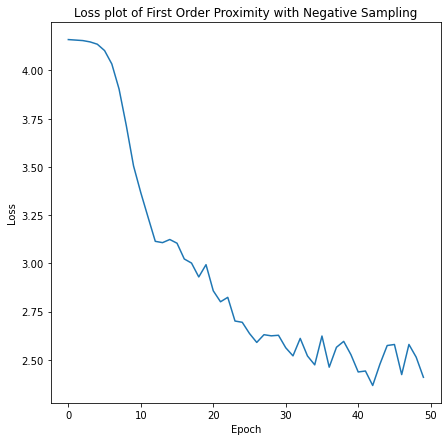

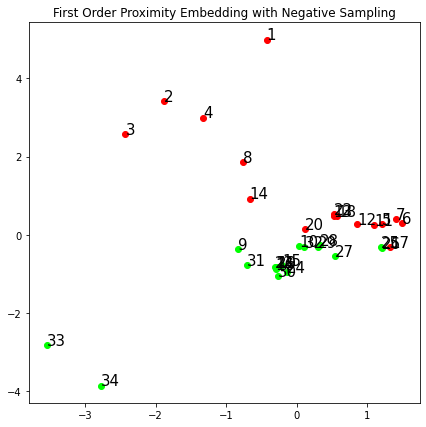

In [33]:
fop_neg.fit(condition = 'fop', 
          training_style = 'neg_sampling', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 50)

plt.figure(figsize = (7,7))
plt.plot(fop_neg.loss)
plt.title("Loss plot of First Order Proximity with Negative Sampling")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result(embedding_result=fop_neg.u, 
                 targets=target, 
                 title='First Order Proximity Embedding with Negative Sampling')

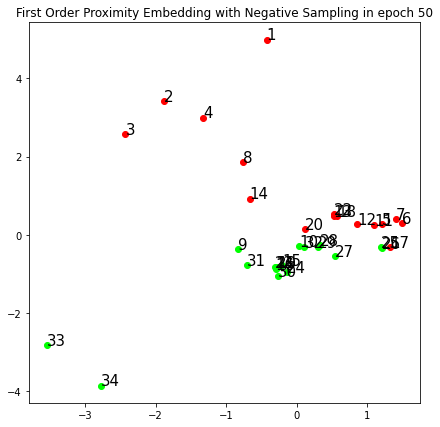

In [35]:
multiple_visualize_result(fop_neg.result, target, "First Order Proximity Embedding with Negative Sampling")

#### 1.1.2. FOP with Softmax

Learning Started!
Learning Finished! It took 0.25705766677856445 seconds


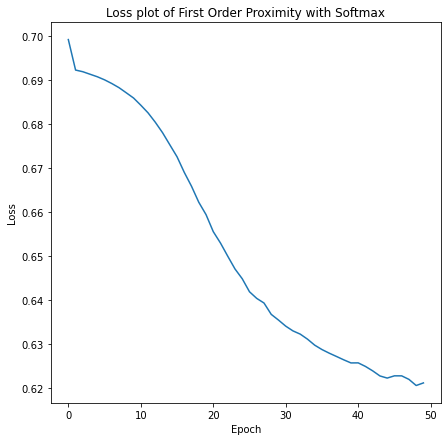

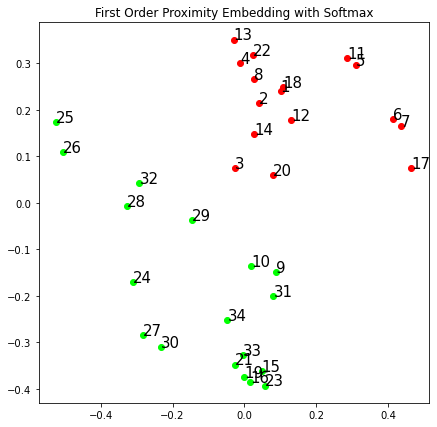

In [27]:
fop_basic.fit(condition = 'fop', 
          training_style = 'basic', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 50)

plt.figure(figsize = (7,7))
plt.plot(fop_basic.loss)
plt.title("Loss plot of First Order Proximity with Softmax")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result(embedding_result=fop_basic.u, 
                 targets=target, 
                 title='First Order Proximity Embedding with Softmax')

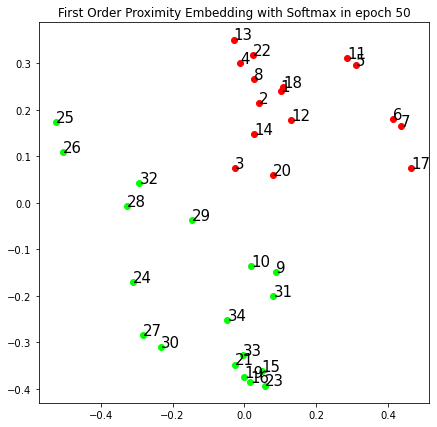

In [36]:
multiple_visualize_result(fop_basic.result, target, "First Order Proximity Embedding with Softmax")

------------

- 두 경우 모두 큰 틀에서는 잘 진행되었습니다.
- 대체적으로 Approximation을 사용하지 않은 임베딩이 더 잘 진행되었습니다.
- 그러나 Negative Sampling이 더 빠르게 수렴하는 모습을 보여주었습니다.
- 허브 (1, 33, 34)는 외곽에 위치하는 경향을 보였습니다.

### 1.2. Second Order Proximity

#### 1.2.1. SOP with Negative Sampling

Learning Started!
Learning Finished! It took 0.927208662033081 seconds


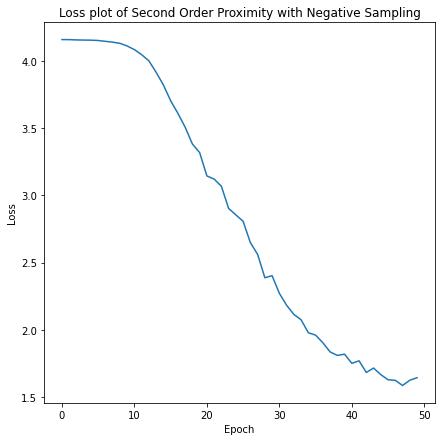

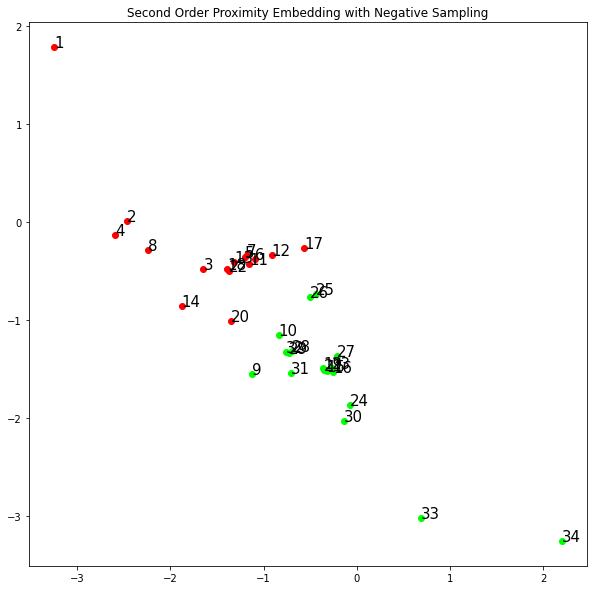

In [65]:
sop_neg.fit(condition = 'sop', 
          training_style = 'neg_sampling', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 50)

plt.figure(figsize = (7,7))
plt.plot(sop_neg.loss)
plt.title("Loss plot of Second Order Proximity with Negative Sampling")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result(embedding_result=sop_neg.u, 
                 targets=target, 
                 title='Second Order Proximity Embedding with Negative Sampling')

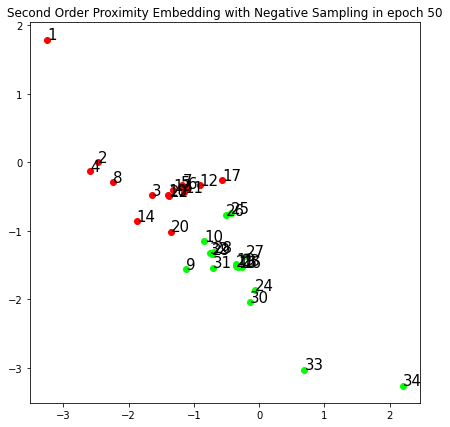

In [69]:
multiple_visualize_result(sop_neg.result, target, "Second Order Proximity Embedding with Negative Sampling")

#### 1.2.2. SOP with Softmax

Learning Started!
Learning Finished! It took 0.32207226753234863 seconds


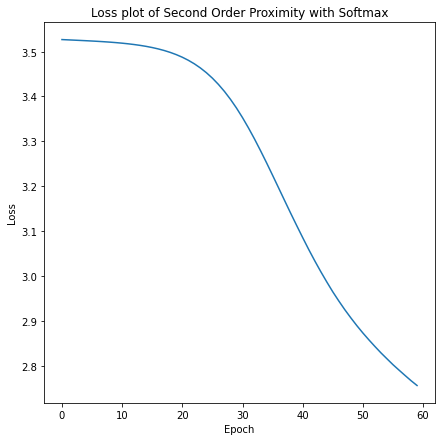

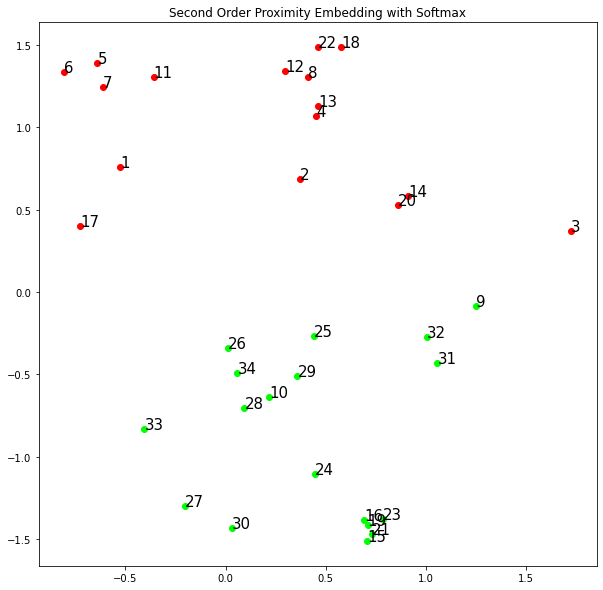

In [63]:
sop_basic.fit(condition = 'sop', 
          training_style = 'basic', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 60)

plt.figure(figsize = (7,7))
plt.plot(sop_basic.loss)
plt.title("Loss plot of Second Order Proximity with Softmax")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result(embedding_result=sop_basic.u, 
                 targets=target, 
                 title='Second Order Proximity Embedding with Softmax')

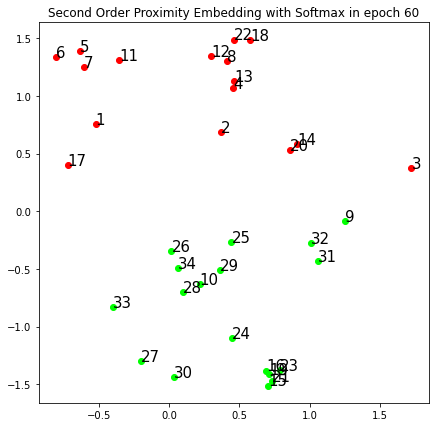

In [71]:
multiple_visualize_result(sop_basic.result, target, "Second Order Proximity Embedding with Softmax")

----------

- 두 경우 모두 큰 틀에서는 잘 진행되었습니다.
- 결과물 자체는 FOP와 동일하게 Approximation을 사용하지 않은 경우가 더 좋은 결과물을 보였습니다.
- 그러나 여기서도 Negative Sampling이 더 빠르게 수렴하는 모습을 보여주었습니다.
- 허브는 이번에도 Negative Sampling에서는 외곽에 위치하는 경향을 보였습니다.

## 2. Football

데이터를 불러오고, 생성합니다.

In [4]:
football = pd.read_csv('football_2.csv', names = ['index1', 'index2'])
football

,index1,index2
0,1,0
1,3,2
2,4,0
3,5,4
4,5,3
...,...,...
608,114,46
609,114,67
610,114,58
611,114,15


In [5]:
adj_fb = np.zeros(115*115).reshape(115, 115)
for i in range(football.shape[0]) : 
    adj_fb[football.iloc[i, :].values[0], football.iloc[i, :].values[1]] = 1

adj_fb_half = adj_fb.copy()
adj_fb = adj_fb + adj_fb.transpose()

fb_target = []
with open('football_label.txt') as f : 
    for line in f : 
        fb_target.append(int(line.rstrip().split()[1]))

In [8]:
fb_colors = []
for i in range(len(set(fb_target))) : 
    fb_colors.append(np.where(np.array(fb_target) == i)[0])

## 색깔별 노드의 class를 할당해줍니다.

Number of Node is 115
Number of Edge is 613


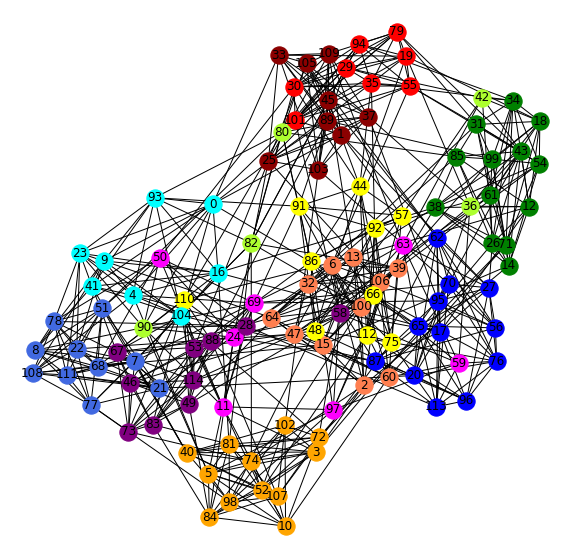

In [9]:
color_list = ["darkred", 'red', 'coral', 'orange', 
             'yellow', 'greenyellow', 'green', 'cyan', 
             'royalblue', 'blue', 'magenta', 'purple']
G_2 = nx.Graph()
for i in range(np.where(adj_fb_half > 0)[0].shape[0]) : 
    G_2.add_edge(np.where(adj_fb_half > 0)[0][i], 
                    np.where(adj_fb_half > 0)[1][i])
print("Number of Node is", G_2.number_of_nodes())
print("Number of Edge is", G_2.number_of_edges())

plt.figure(figsize = (10,10))
pos = nx.spring_layout(G_2)
for i in range(len(set(fb_target))) : 
    nx.draw_networkx_nodes(G_2, pos, 
                          nodelist = list(fb_colors[i]), 
                          node_color = color_list[i])
nx.draw_networkx_edges(G_2, pos)
nx.draw_networkx_labels(G_2, pos, font_size=12)
plt.axis("off")
plt.savefig("Football.PNG")

In [28]:
fb_fop_basic = LINE_multiple(adj_fb)
fb_sop_basic = LINE_multiple(adj_fb)
fb_fop_neg = LINE_multiple(adj_fb)
fb_sop_neg = LINE_multiple(adj_fb)

### 2.1. First Order Proximity

#### 2.1.1. FOP with Softmax

Learning Started!
Learning Finished! It took 4.945112466812134 seconds


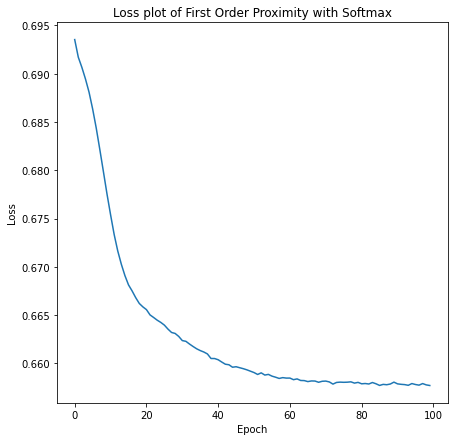

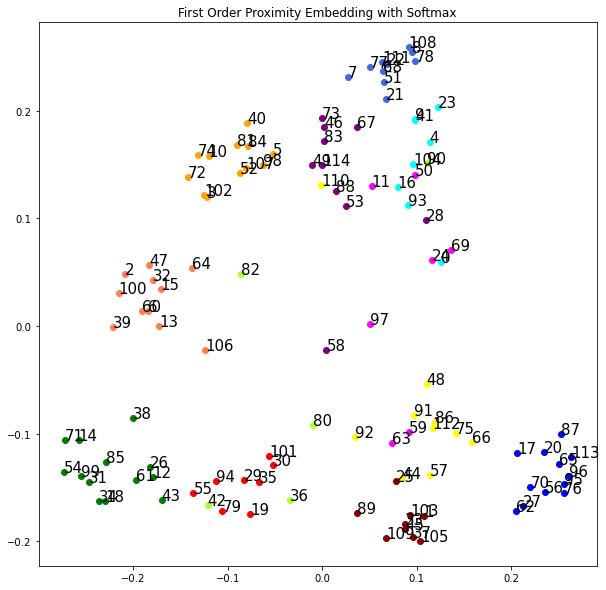

In [35]:
fb_fop_basic.fit(condition = 'fop', 
          training_style = 'basic', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 100)

plt.figure(figsize = (7,7))
plt.plot(fb_fop_basic.loss)
plt.title("Loss plot of First Order Proximity with Softmax")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result_fb(embedding_result = fb_fop_basic.u, 
                 targets=fb_target, 
                 title='First Order Proximity Embedding with Softmax')

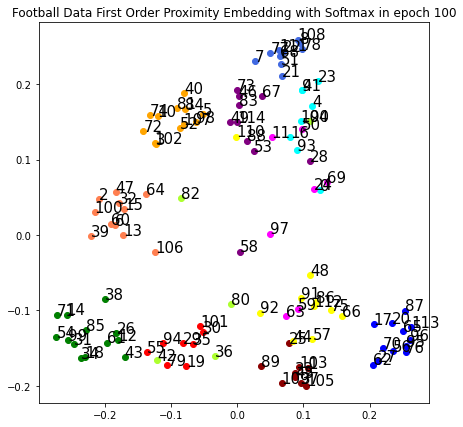

In [92]:
multiple_visualize_result_fp(m_embedding_result = fb_fop_basic.result, 
                             targets = fb_target, 
                             title = "Football Data First Order Proximity Embedding with Softmax")

#### 2.1.2. FOP with Negative Sampling

Learning Started!
Learning Finished! It took 15.299440383911133 seconds


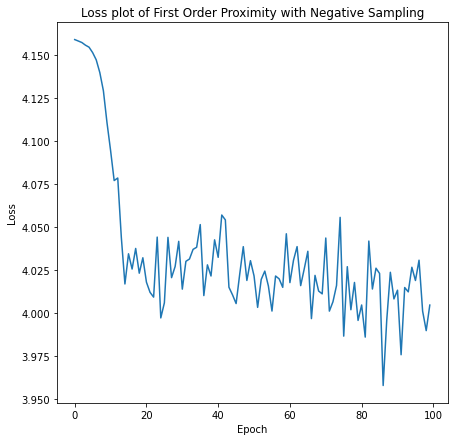

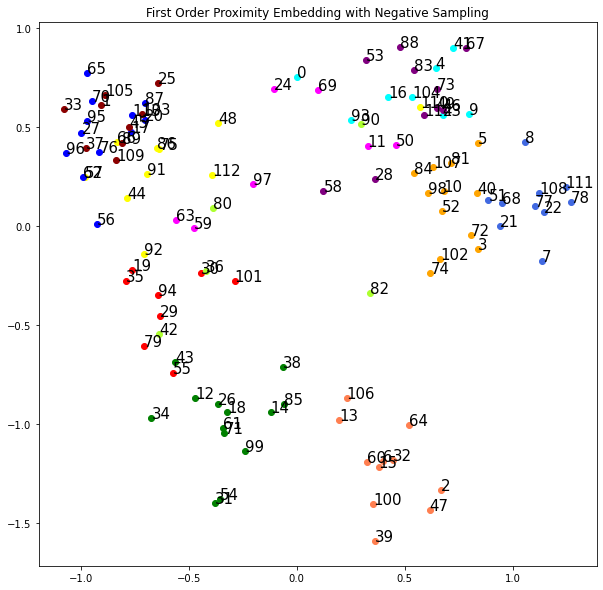

In [44]:
fb_fop_neg.fit(condition = 'fop', 
          training_style = 'neg_sampling', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 100)

plt.figure(figsize = (7,7))
plt.plot(fb_fop_neg.loss)
plt.title("Loss plot of First Order Proximity with Negative Sampling")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result_fb(embedding_result = fb_fop_neg.u, 
                 targets=fb_target, 
                 title='First Order Proximity Embedding with Negative Sampling')

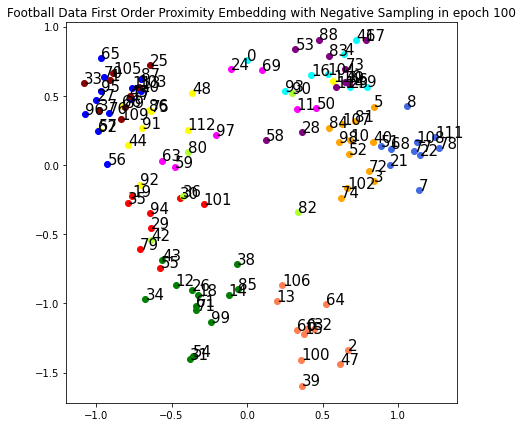

In [93]:
multiple_visualize_result_fp(m_embedding_result = fb_fop_neg.result, 
                             targets = fb_target, 
                             title = "Football Data First Order Proximity Embedding with Negative Sampling")

### 2.2. Second Order Proximity

#### 2.2.1. SOP with Softmax

Learning Started!
Learning Finished! It took 3.7770516872406006 seconds


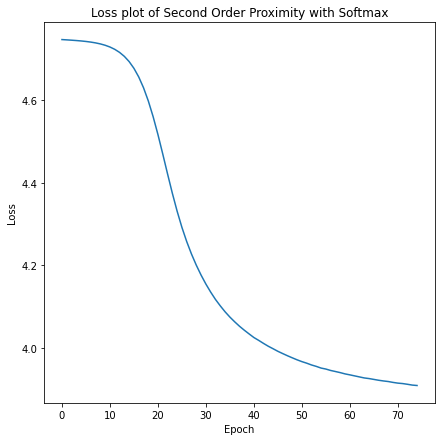

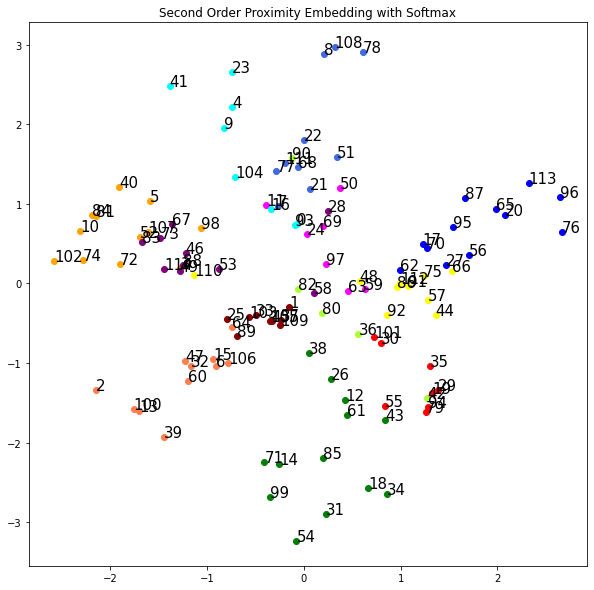

In [89]:
fb_sop_basic.fit(condition = 'sop', 
          training_style = 'basic', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.1, 
          lr = 0.02, 
          epochs = 75)

plt.figure(figsize = (7,7))
plt.plot(fb_sop_basic.loss)
plt.title("Loss plot of Second Order Proximity with Softmax")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result_fb(embedding_result = fb_sop_basic.u, 
                 targets=fb_target, 
                 title='Second Order Proximity Embedding with Softmax')

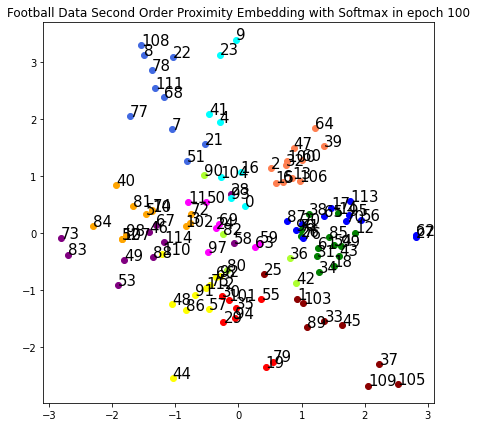

In [54]:
multiple_visualize_result_fp(m_embedding_result = fb_sop_basic.result, 
                             targets = fb_target, 
                             title = "Football Data Second Order Proximity Embedding with Softmax")

#### 2.2.2. SOP with Negative Sampling

Learning Started!
Learning Finished! It took 11.003796815872192 seconds


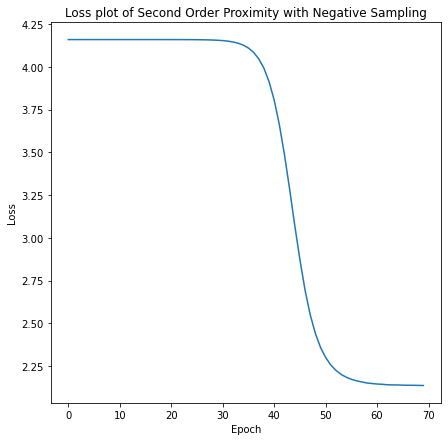

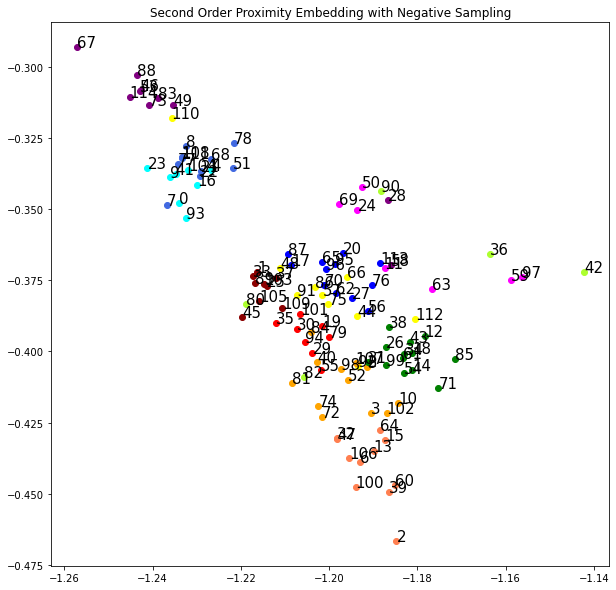

In [90]:
fb_sop_neg.fit(condition = 'sop', 
          training_style = 'neg_sampling', 
          k = 5, 
          power = 0.75,
          h = 2,
          init_method = 'normal', 
          var = 0.001, 
          lr = 0.01, 
          epochs = 70)

plt.figure(figsize = (7,7))
plt.plot(fb_sop_neg.loss)
plt.title("Loss plot of Second Order Proximity with Negative Sampling")
plt.xlabel('Epoch')
plt.ylabel('Loss')

visualize_result_fb(embedding_result = fb_sop_neg.u, 
                 targets=fb_target, 
                 title='Second Order Proximity Embedding with Negative Sampling')

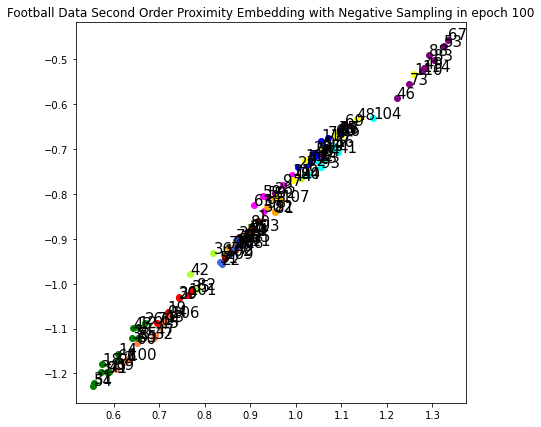

In [88]:
multiple_visualize_result_fp(m_embedding_result = fb_sop_neg.result, 
                             targets = fb_target, 
                             title = "Football Data Second Order Proximity Embedding with Negative Sampling")